In [1]:
# menu column at left and images list at right. to be refined..
# plus some styling
from IPython.display import HTML
import urllib2
TOC="https://gist.githubusercontent.com/astyonax/1d7f49edefd9728b7da0/raw"
TOC=urllib2.urlopen(TOC).read()
INAV="https://gist.github.com/astyonax/815eacf44e2efd5eb0a7/raw"
INAV=urllib2.urlopen(INAV).read()
style="https://gist.githubusercontent.com/astyonax/d53a8eb1c556168a65f5/raw"
style=urllib2.urlopen(style).read()
HTML("""
<style>{2}</style>
<style>
    .container{{
        width: 90% !important;
        max-width:90% !important;
    }}
    #img_nav{{
    
        max-width:10% !important;
        padding: 1px !important;
        z-index:10000000000 !important;
    }}
    #thumb_nav{{
        max-width:100%;
    }}
    div.output_area img {{
    max-width:95% !important;
    }}
</style>

<div id="toc"></div>
<script type="text/javascript">
{0}
</script>
<div id="img_nav"></div>
<script type="text/javascript">
{1}
</script>""".format(TOC,INAV,style))

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
import pma
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


In [2]:
records=pd.read_csv("terremoti.csv",sep="|",parse_dates=['Time'])

In [3]:
print records.keys()
print records.shape

Index([u'#EventID', u'Time', u'Latitude', u'Longitude', u'Depth/Km', u'Author',
       u'Catalog', u'Contributor', u'ContributorID', u'MagType', u'Magnitude',
       u'MagAuthor', u'EventLocationName', u'web_id_locator(deprecated)'],
      dtype='object')
(4000, 14)


In [62]:
records['deltaT']=records['Time'].diff().values.astype(float)
records['TimeTrue']=records['Time'].values.astype(float)

In [76]:
xyz=records[['Latitude','Longitude','Magnitude','Depth/Km','TimeTrue','deltaT']].values[1:].T
print xyz.dtype
#xyz[4]=records['deltaT'].values[1:].astype(float)
xyz[2]/=xyz[2].max()
xyz[3]/=xyz[3].max()
xyz[4]/=xyz[4].max()
xyz[-1]/=xyz[-1].max()


float64


35.09 47.965 6.364 18.944


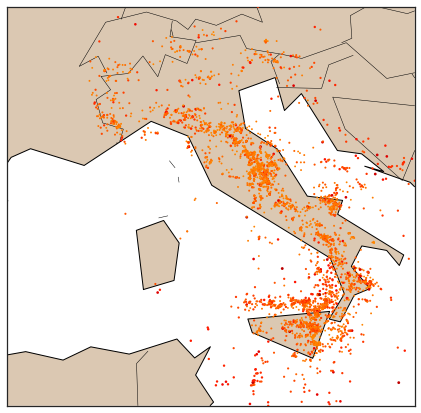

In [6]:
colors=sns.plt.cm.jet(xyz[2]**.25)
#f,a=sns.plt.subplots(1,1,figsize=(10,8))

x1,x2,x3,x4=records['Latitude'].min(),records['Latitude'].max(),records['Longitude'].min(),records['Longitude'].max()
print x1,x2,x3,x4

m=Basemap(projection='mill',llcrnrlat=x1,urcrnrlat=x2,llcrnrlon=x3/2,urcrnrlon=x4,resolution = 'c')
m.drawcoastlines()
m.drawcountries()
#m.bluemarble()
m.fillcontinents(color="#dbc8b2")

x,y=m(xyz[1],xyz[0])

m.scatter(x,y,alpha=1,lw=0,s=xyz[2]*10,zorder=1e5,c=colors)

In [7]:
from pandas.tools.plotting import scatter_matrix

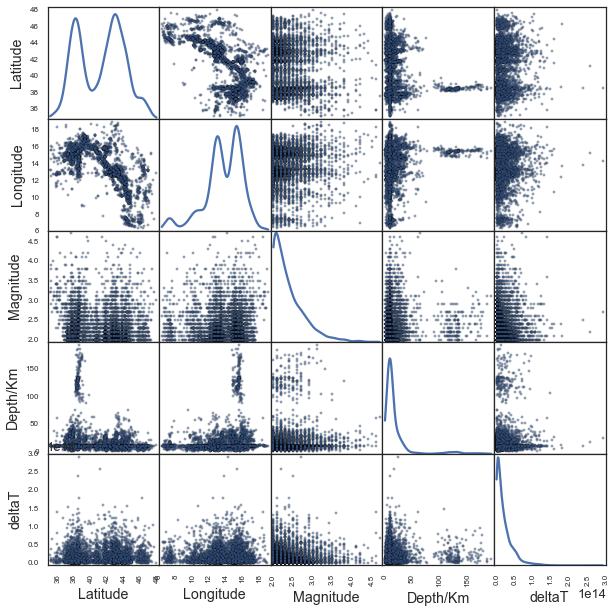

In [8]:
X=records[['Latitude','Longitude','Magnitude','Depth/Km','deltaT']][1:]
X=X[X['Depth/Km']<200]
_=scatter_matrix(X, alpha=.5, figsize=(10, 10), diagonal='kde')

#Linear PCA

In [9]:
#xyz=records[['Latitude','Longitude','Magnitude','Depth/Km','deltaT']].values[1:].T
lxyz=xyz.T.copy()
lxyz=lxyz[:,2:]

lxyz/=lxyz.std(axis=0)

"Magnitude,Depth,deltaT"
print lxyz.shape
l,e,MD=pma.pma(lxyz)
X=pma.get_XY(lxyz,e)

(3999, 3)


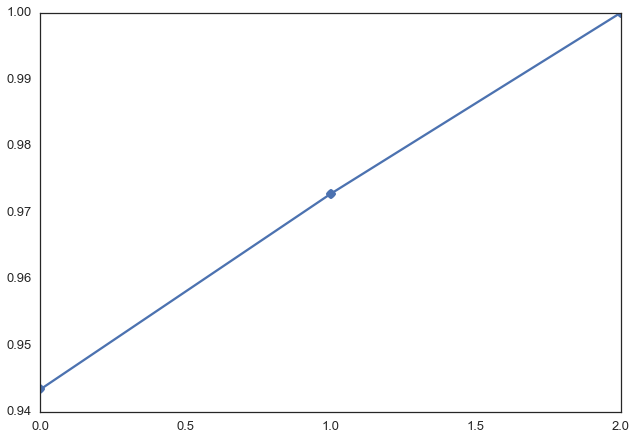

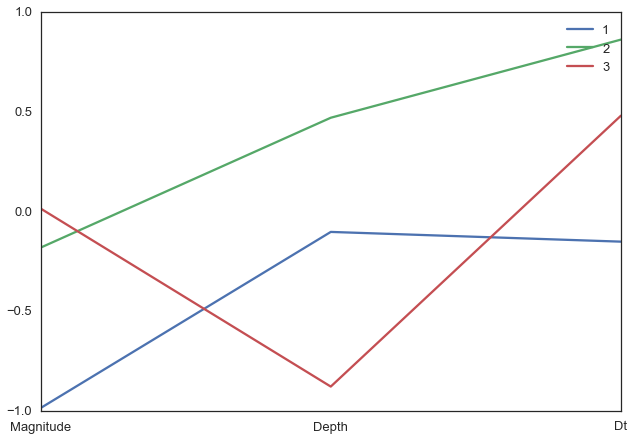

In [10]:
sns.plt.plot(np.cumsum(l)/np.sum(l),'o-')
sns.plt.figure()
sns.plt.plot(e[:,:3])
sns.plt.legend("123")
ax=sns.plt.gca()
ax.xaxis.set_ticks([0,1,2])
ax.xaxis.set_ticklabels(["Magnitude","Depth","Dt"])

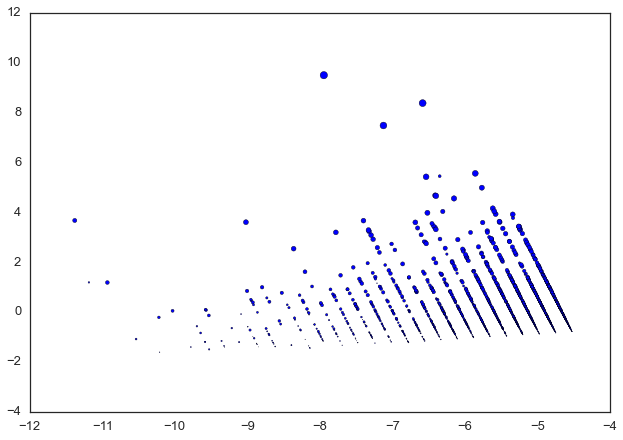

In [11]:
sns.plt.scatter(X[0],X[1],s=X[2]*10)

35.09 47.965 6.364 18.944



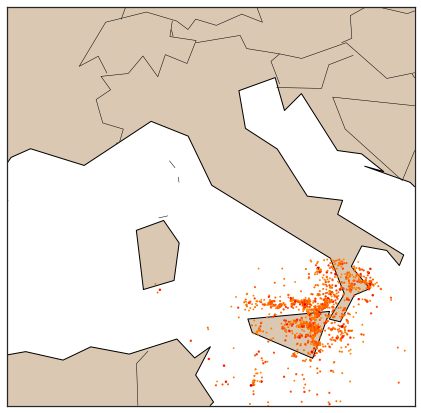

In [12]:
# colors=sns.plt.cm.jet(xyz[2]**.25)
#f,a=sns.plt.subplots(1,1,figsize=(10,8))

x1,x2,x3,x4=records['Latitude'].min(),records['Latitude'].max(),records['Longitude'].min(),records['Longitude'].max()
print x1,x2,x3,x4

m=Basemap(projection='mill',llcrnrlat=x1,urcrnrlat=x2,llcrnrlon=x3/2,urcrnrlon=x4,resolution = 'c')
m.drawcoastlines()
m.drawcountries()
#m.bluemarble()
m.fillcontinents(color="#dbc8b2")
print 
txyz=xyz[:,xyz[0]<40]
x,y=m(txyz[1],txyz[0])

m.scatter(x,y,alpha=1,lw=0,s=xyz[2]*10,zorder=1e5,c=colors)

In [28]:
import scipy.spatial.distance as ssd
import scipy

In [19]:
print txyz.shape
pdists=ssd.squareform(ssd.pdist(xyz.T[:,:2]))
#zz=np.asarray([xyz[-1],xyz[-1]]).T
#tdists=ssd.squareform(ssd.pdist(zz,'braycurtis'))

print pdists.shape
#print tdists.shape

(5, 1579)
(3999, 3999)
(3999, 3999)


In [77]:
mx,my=scipy.meshgrid(xyz[-2],xyz[-2])

In [78]:
tdists=lambda u,v:u-v
tdists=tdists(mx,my)
tdists[tdists<0]=np.nan

In [79]:
print tdists.shape
print (tdists<0).sum()/tdists.shape[0]**2.

(3999, 3999)
0.0


7994001


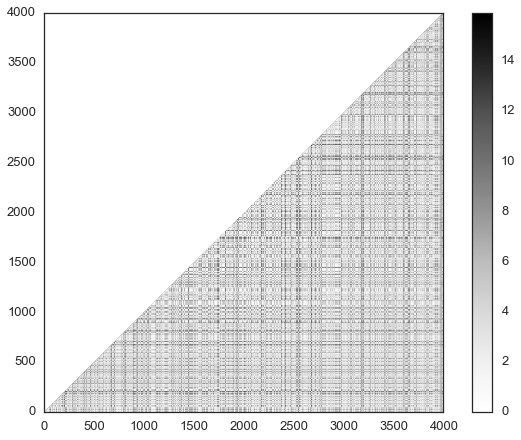

In [93]:
d_n_t=pdists/(tdists+1)
print np.isnan(d_n_t).sum()
sns.plt.imshow((d_n_t),origin="bottom")
sns.plt.colorbar()
sns.plt.figure()


#_=sns.plt.hist(np.ma.masked_invalid(d_n_t[:,0]),bins=np.arange(0,6,.2))
#_=sns.plt.hist(np.ma.masked_invalid(pdists[d_n_t[:,0]<2,0]),bins=np.arange(0,6,.2))

35.09 47.965 6.364 18.944
(5, 1579)


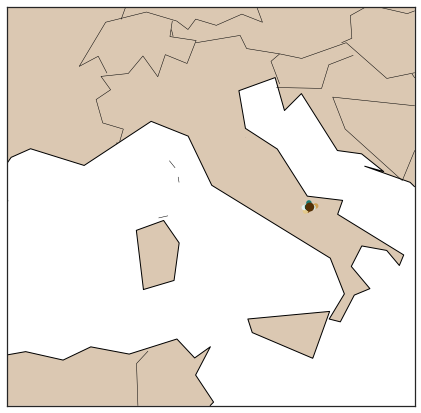

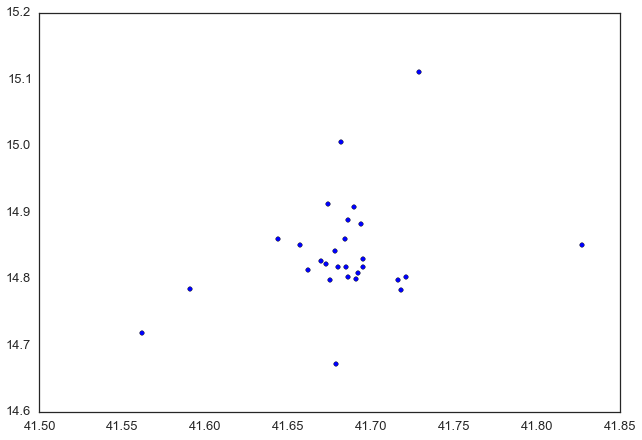

In [116]:
# colors=sns.plt.cm.jet(xyz[2]**.25)
#f,a=sns.plt.subplots(1,1,figsize=(10,8))

x1,x2,x3,x4=records['Latitude'].min(),records['Latitude'].max(),records['Longitude'].min(),records['Longitude'].max()
print x1,x2,x3,x4

m=Basemap(projection='mill',llcrnrlat=x1,urcrnrlat=x2,llcrnrlon=x3/2,urcrnrlon=x4,resolution = 'c')
m.drawcoastlines()
m.drawcountries()
#m.bluemarble()
m.fillcontinents(color="#dbc8b2")
print txyz.shape

trs=.25
t=np.where(d_n_t[0]>trs)[0]
t2=np.where(d_n_t[t[0]]>trs)[0]
t3=np.where(d_n_t[t2[0]]<trs)[0]

tfxyz=xyz[:,t3]
x,y=m(tfxyz[1],tfxyz[0])

N=x.shape[0]
colors=sns.plt.cm.BrBG(np.arange(0.,N,1.)/N)


m.scatter(x,y,alpha=1,lw=0,s=30,zorder=1e5,c=colors)
m.scatter(x[0],y[0],alpha=1,lw=0,s=80,zorder=1e5,c=colors)

pl=sns.plt
pl.figure()
pl.scatter(tfxyz[0],tfxyz[1])




377


# non linear PCA
http://sebastianraschka.com/Articles/2014_kernel_pca.html#nonlinear-dimensionality-reduction

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=100, fit_inverse_transform=1)
kpca_in =xyz[:,:2]
kpca_out=scikit_kpca.fit_transform(kpca_in)
kpca_out_inv=scikit_kpca.inverse_transform(kpca_out)
print "doing pca"
l,e,_=pma.pma(kpca_in)
pca_out=np.asarray(pma.get_XY(kpca_in,e))


doing pca


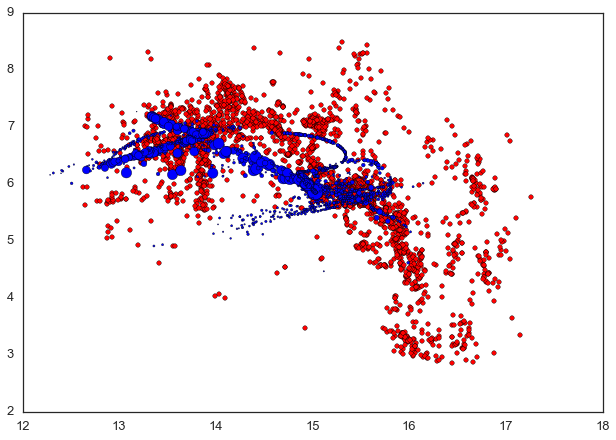

In [14]:
sns.plt.scatter(*kpca_in.T,c='r')
#sns.plt.scatter(*kpca_out.T,c='r')
sns.plt.scatter(*kpca_out_inv.T,s=xyz[:,3]*20)
#sns.plt.scatter(*pca_out,c='g')